In [30]:
import preprocess_music as ppm
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
import torch, torchaudio

In [10]:
MUSIC_FOLDER = 'data/music'
OLD_MACDONALD_SONG_PATH = f'{MUSIC_FOLDER}/old-macdonald-had-a-farm.wav'

In [11]:
waveform, sr = librosa.load(OLD_MACDONALD_SONG_PATH)

In [16]:
print(f'The sampling rate is: {sr}')

The sampling rate is: 22050
0.6113404


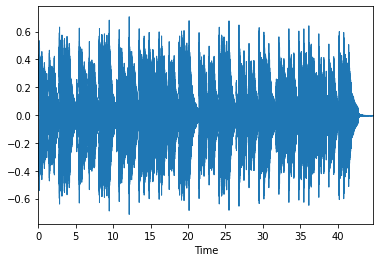

In [37]:
old_macdonald_song, _ = librosa.effects.trim(waveform)
librosa.display.waveplot(old_macdonald_song, sr=sr)

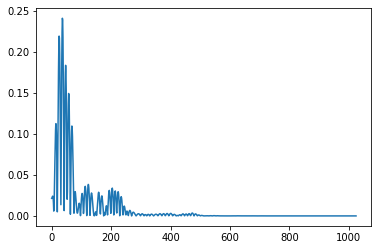

In [38]:
n_fft = 2048
D = np.abs(librosa.stft(old_macdonald_song[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
plt.plot(D)

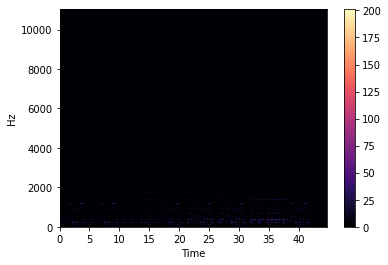

In [39]:
hop_length = 512
D = np.abs(librosa.stft(old_macdonald_song, n_fft=n_fft,  hop_length=hop_length))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear');
plt.colorbar();

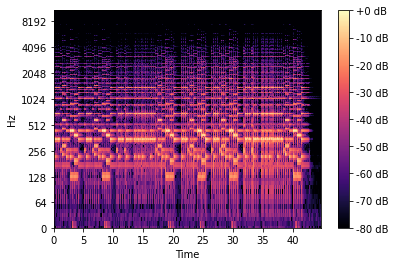

In [40]:
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

f:\Programming\Projects\thesisMusicGeneration\music_gen_venv\lib\site-packages\torchaudio\functional\functional.py:432: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (80) may be set too high. Or, the value for `n_freqs` (129) may be set too low.
  warnings.warn(


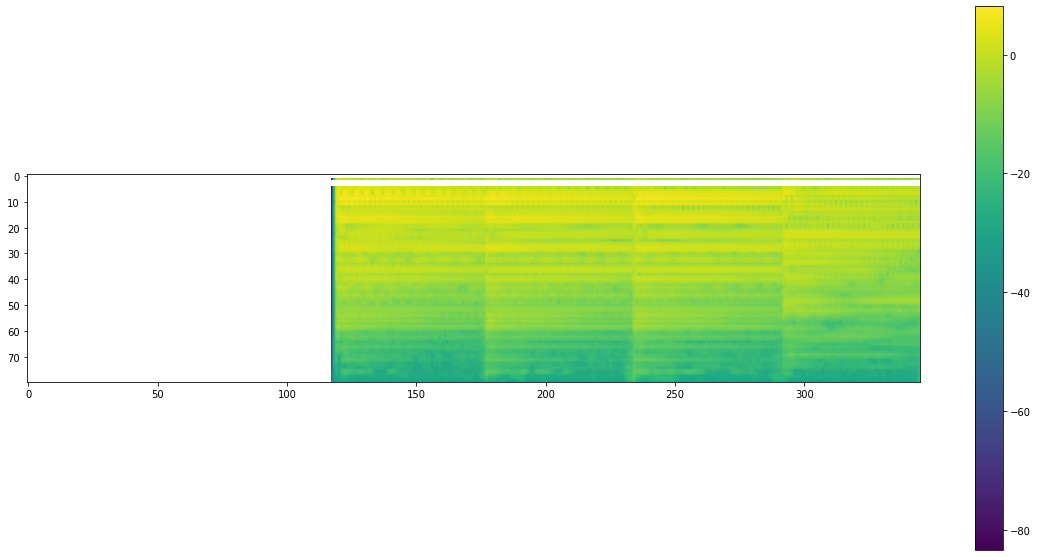

In [41]:
chunk_size_s = 2
overlap = 0
chunk_size = int(chunk_size_s * sr)

def chunk_waveform(waveform, chunk_size, overlap):
    idx = 0
    overlap_chunk = int(overlap * chunk_size)
    while idx + chunk_size - overlap_chunk <= len(waveform):
        yield waveform[idx:idx + chunk_size - overlap_chunk]
        idx += chunk_size - overlap_chunk

chunks = torch.FloatTensor(list(chunk_waveform(waveform, chunk_size, overlap)))
chunk = chunks[0]

specgram = torchaudio.transforms.MelSpectrogram(n_mels=80, n_fft=256)(chunk.reshape(1,-1))
plt.figure(figsize=(20,10))
plt.imshow(specgram.log2()[0,:,:].detach().numpy())
plt.colorbar()
# plt.show()
plt.savefig(f"twinkle_{chunk_size_s}s_spec.png")

Text(0.5, 1.0, "Mel-frequency spectrogram of first 5s of 'Old Macdonald'")

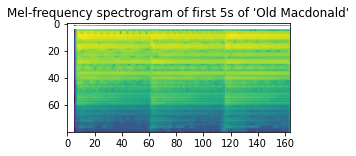

In [57]:
s = ppm.spectrogram(old_macdonald_song[:int(sr*1)], sr)
fig = plt.figure(figsize=(18,2))
plt.xticks(np.arange(0, specgram.shape[-1], 20))
plt.imshow(s.log2()[0,:,:].detach().numpy())
plt.title("Mel-frequency spectrogram of first 5s of 'Old Macdonald'")